<a href="https://colab.research.google.com/github/wachiravitlouis20/Projects-Load-Approval/blob/main/Loan_Approval_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

100%|██████████| 751k/751k [00:00<00:00, 1.65MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects loan/loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
## Clean Data Person age , Person emp exp
print("Original shape:", df.shape) ## Check row and column
df_cleaned = df[df['person_age'] <= 100]
df_cleaned = df[df['person_emp_exp'] <= 65]
print("Cleand shape:", df_cleaned.shape)

Original shape: (45000, 14)
Cleand shape: (44992, 14)


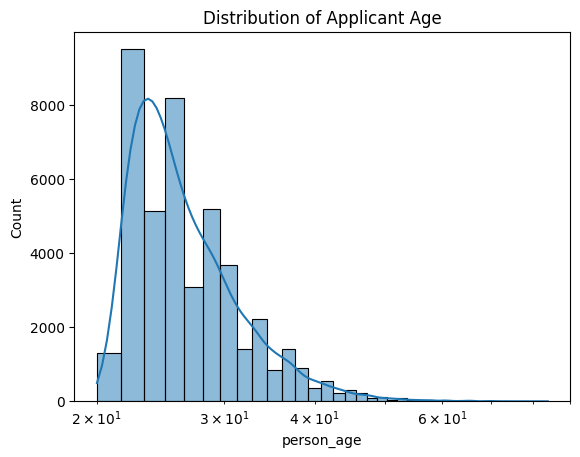

In [6]:
# สร้างกราฟฮิสโตแกรมของ 'person_age'
sns.histplot(data=df_cleaned, x='person_age', bins=40, kde=True)
plt.xscale('log')
plt.title('Distribution of Applicant Age')
plt.show()

## การกระจายตัวของอายุผู้ขอสินเชื่อ

"การกระจายตัวของผู้ขอสินเชื่อตามอายุ (person_age) แสดงให้เห็นว่ากลุ่มผู้กู้ส่วนใหญ่เป็นกลุ่มคนวัยทำงานตอนต้น โดยมีการกระจุกตัวหนาแน่นที่สุดในช่วงอายุ 20 ถึง 30 ปี และหลังจากช่วงอายุดังกล่าว จำนวนผู้ขอสินเชื่อมีแนวโน้มลดลงอย่างต่อเนื่องเมื่ออายุสูงขึ้น"

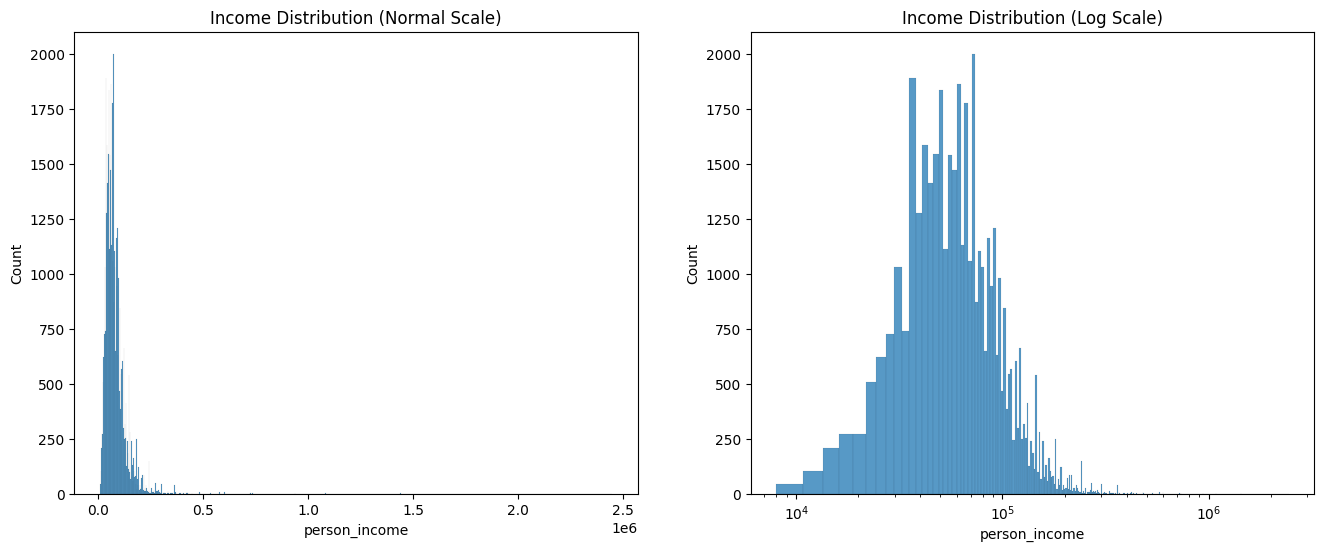

In [7]:
## สร้างกราฟเพื่อเปรียบเทียบความแตกต่างระหว่าง Normal Scale กับ Log scale
# สร้างพื้นที่สำหรับพล็อต 2 กราฟข้างกัน (1 แถว 2 คอลัมน์)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- กราฟที่ 1: มาตราส่วนปกติ (Linear Scale) ---
sns.histplot(data=df_cleaned, x='person_income', ax=axes[0])
axes[0].set_title('Income Distribution (Normal Scale)')

# --- กราฟที่ 2: มาตราส่วนล็อก (Log Scale) ---
sns.histplot(data=df_cleaned, x='person_income', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Income Distribution (Log Scale)')

plt.show()

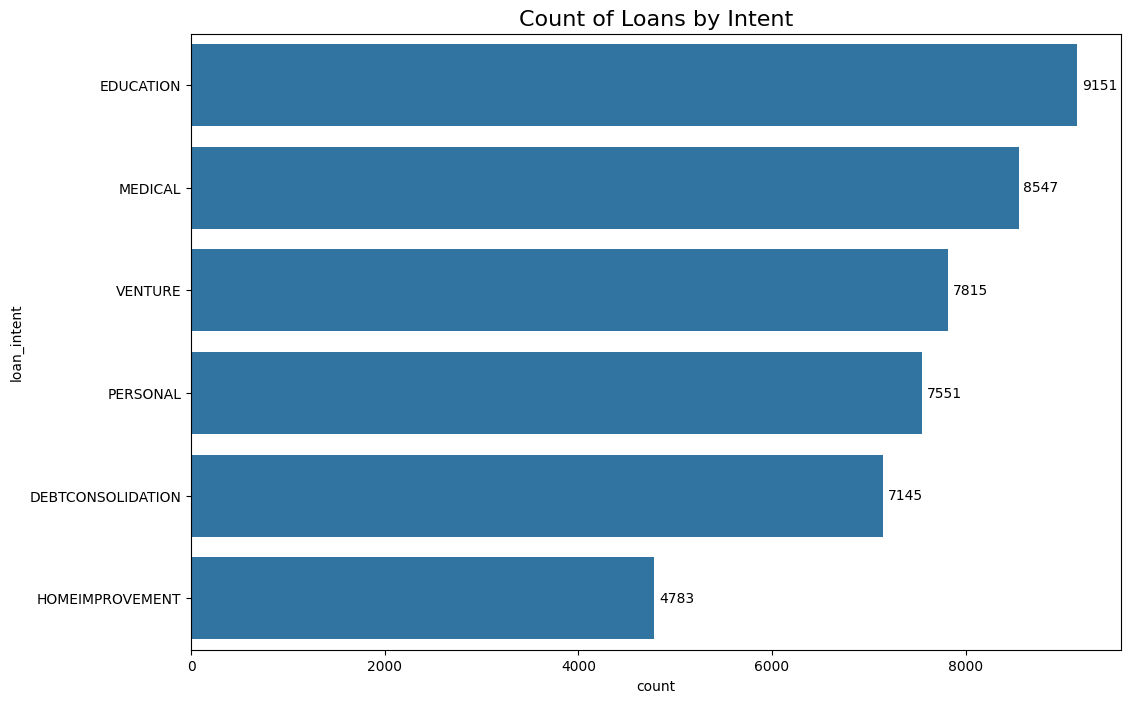

In [8]:
plt.figure(figsize=(12, 8))

# 1. สร้างกราฟ Countplot เหมือนเดิม และเก็บผลลัพธ์ไว้ในตัวแปร ax
ax = sns.countplot(data=df_cleaned, y='loan_intent', order=df_cleaned['loan_intent'].value_counts().index)

plt.title('Count of Loans by Intent', fontsize=16)

# 2. ส่วนที่เพิ่มเข้ามา: การวนลูปเพื่อใส่ตัวเลขกำกับ
for patch in ax.patches:
    ax.text(patch.get_width() + 50,
            patch.get_y() + patch.get_height() / 2,
            f'{int(patch.get_width())}',
            va='center')

plt.show()

Filtering for 'Approved' loans (loan_status == 1)...


/tmp/ipython-input-9-2856889972.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


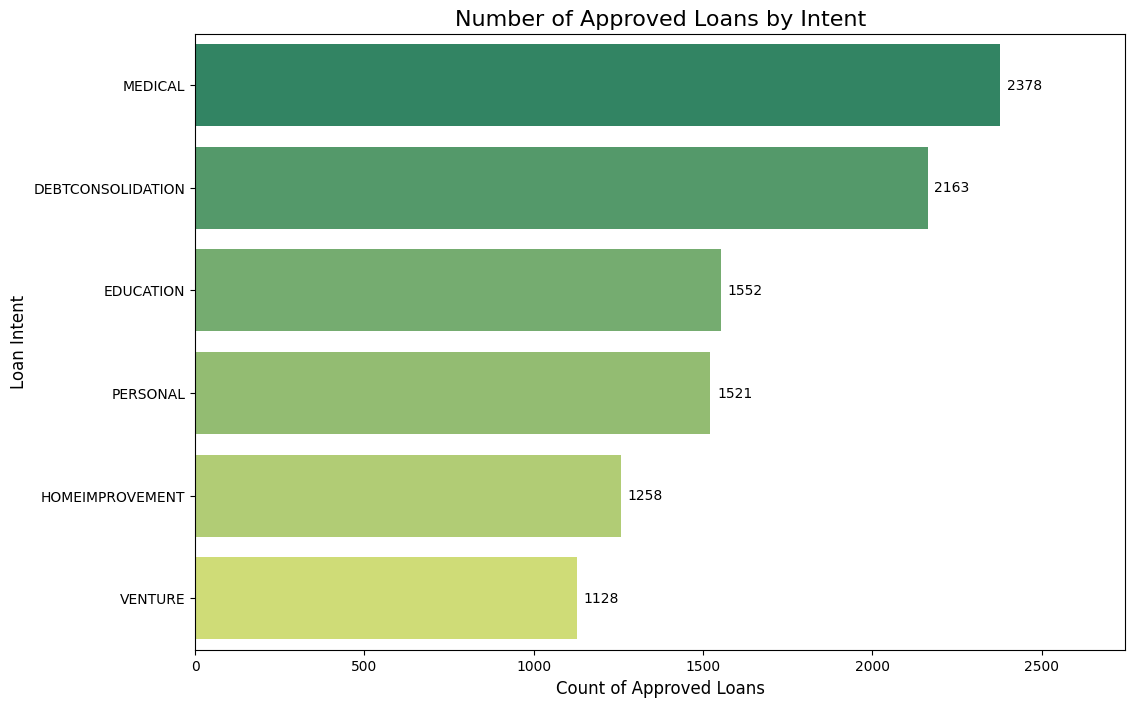

In [9]:
## Approved Load by intent

# 1. กรอง DataFrame ให้เหลือเฉพาะแถวที่ loan_status เป็น 1 (Approved)
print("Filtering for 'Approved' loans (loan_status == 1)...")
approved_df = df_cleaned[df_cleaned['loan_status'] == 1].copy()

# 2. สร้างกราฟแท่ง (countplot) จากข้อมูล approved_df ที่กรองแล้ว
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=approved_df,
    y='loan_intent',
    order=approved_df['loan_intent'].value_counts().index,
    palette='summer'
)

# 3. ใส่ตัวเลขกำกับบนแต่ละแท่ง
for patch in ax.patches:
    ax.text(patch.get_width() + 20,
            patch.get_y() + patch.get_height() / 2,
            f'{int(patch.get_width())}',
            va='center')


plt.title('Number of Approved Loans by Intent', fontsize=16)
plt.xlabel('Count of Approved Loans', fontsize=12)
plt.ylabel('Loan Intent', fontsize=12)
# ขยายแกน X เล็กน้อยเพื่อให้มีที่ว่างสำหรับตัวเลข
plt.xlim(0, ax.get_xlim()[1] * 1.1)
plt.show()


Applying the correct mapping: 0 = Not Approved, 1 = Approved
Calculating proportions for each loan intent...
Generating plot...


/tmp/ipython-input-10-2888977401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({0: 'Not Approved', 1: 'Approved'})


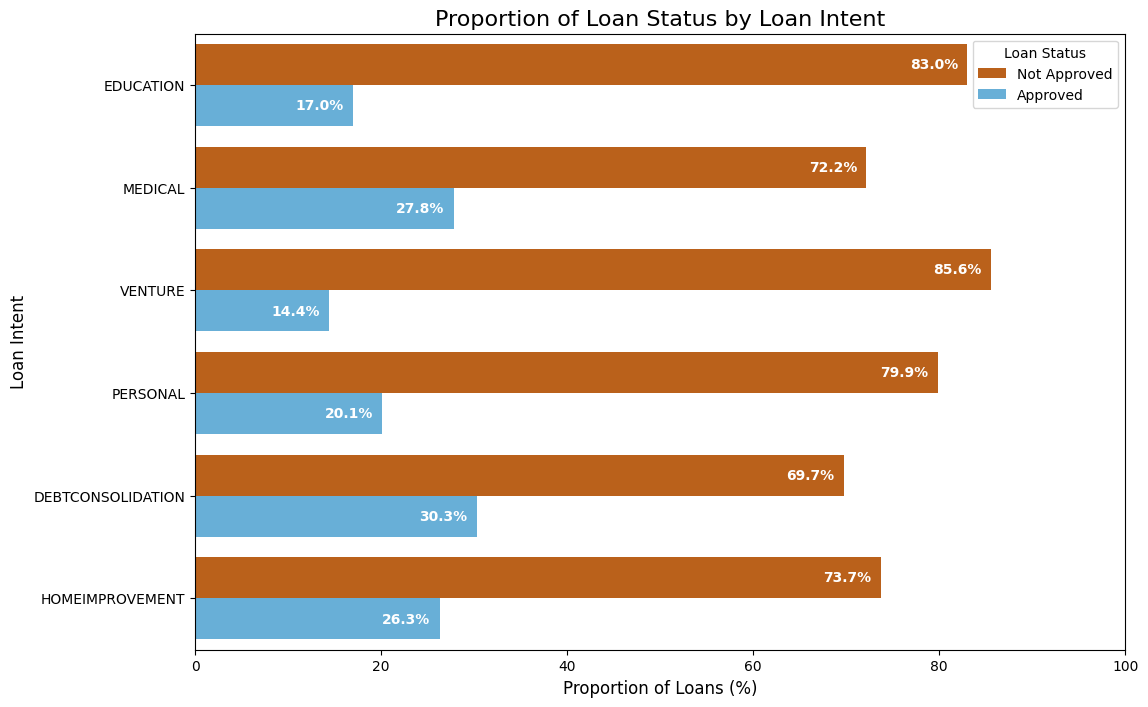

In [10]:
# [ส่วนที่ 1] การเตรียมข้อมูล (เหมือนเดิม)
# 0 = Not Approved, 1 = Approved
print("Applying the correct mapping: 0 = Not Approved, 1 = Approved")
df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({0: 'Not Approved', 1: 'Approved'})


# [ส่วนที่ 2]  คำนวณสัดส่วน (Proportion) ก่อน
print("Calculating proportions for each loan intent...")
prop_df_intent = df_cleaned.groupby('loan_intent')['loan_status_label'] \
    .value_counts(normalize=True) \
    .mul(100) \
    .rename('proportion') \
    .reset_index()


# [ส่วนที่ 3]  สร้างกราฟด้วย barplot และใส่ Label %
print("Generating plot...")
plt.figure(figsize=(12, 8))
# เราจะเปลี่ยนไปใช้ sns.barplot เพื่อพล็อตค่า 'proportion' ที่เราคำนวณไว้
ax = sns.barplot(
    data=prop_df_intent,
    y='loan_intent',
    x='proportion',  # แกน X คือค่า 'proportion' ที่เราคำนวณ
    hue='loan_status_label',
    order=df_cleaned['loan_intent'].value_counts().index,
    palette={'Approved': '#56B4E9', 'Not Approved': '#D55E00'}
)

# [ส่วนที่ 4] เพิ่ม % กำกับบนแต่ละแท่ง
for patch in ax.patches:
    # ความยาวของแท่งคือค่า %
    width = patch.get_width()
    # สร้างข้อความ %
    label_text = f'{width:.1f}%'
    # ตำแหน่งแกน Y ของตัวอักษร
    y_position = patch.get_y() + patch.get_height() / 2

    # [โค้ช] ย้ายตัวอักษรมาไว้ข้างในแท่งเพื่อให้อ่านง่าย
    # และจะแสดงก็ต่อเมื่อแท่งมีความกว้างพอ
    if width > 5:
        ax.text(width - 1, y_position, label_text, va='center', ha='right', color='white', weight='bold')

# [ส่วนที่ 5] ตกแต่งกราฟ
plt.title('Proportion of Loan Status by Loan Intent', fontsize=16)
plt.xlabel('Proportion of Loans (%)', fontsize=12) # เปลี่ยน Label แกน X
plt.ylabel('Loan Intent', fontsize=12)
plt.legend(title='Loan Status')
plt.xlim(0, 100) # เปอร์เซ็นต์จะสิ้นสุดที่ 100
plt.show()

## เปรียบเทียบอัตรสัดส่วนนอนุมัติผ่านของสินเชื่อ
1. Education (การศึกษา)จากกราฟจะเห็นได้ว่า Education จะมีจำนวนการยื่นทำสินเชื่อเยอะที่สุดแต่ในขณะเดียวกันก็เป็นสินเชื่อที่มีอัตราอนุมัติต่ำที่สุดจากทั้งหมด
2. Medica (การแพทย์)l จากกราฟจะเห็นได้ว่าสินเชื่อการแพทย์มีอัตราอนุมัติผ่านอยู่ที่ 27.8% จากทั้งหมดซึ่งมีอัตราการอนุมัติผ่านอยู่ในลำดับ 2 ของทั้งหมด
3. Venture (การกู้เงินเพื่อนำไปลงทุน) จากกราฟจะเห็นได้ว่า Venture เป็นสินเชื่อที่อยู่อันดับต่ำที่สุดของสินเชื่อ 14.4 % เนื่องด้วยการกู้ไปลงทุนนั้นลูกค้ามีความเสี่ยงที่จะขาดทุนเพิ่มขึ้นมาและอีกหลายปัจจัยจึงเป็นผลให้ Venture จะอยู่ในลำดับสุดท้าย
4. Personal (ส่วนตัว) จากกราฟจะเห็นได้ว่า Perseonal มีอัตราการอนุมัติผ่านอยู่ที่ 20.1 % อันดับที่ 4 จากทั้งหมด
5. Debtconsolidation (การรวมหนี้) มีอัตราส่วนในการ Approved 30.3 % ผ่านอยู่สูงที่สุดเป็นอันดับ 1 ซึ่งการรวมนี้นั้นส่งผลดีกับทั้งตัวผู้กู้เองและธนาคารอีกด้วยจึงมีความเป็นไปได้ที่ทางธนาคารเล็งเห็นประโยชน์ตรงส่วนนี้และอนุมัติผ่านมากที่สุด
6. Homeimprovement (การกู้เพื่อซ่อมบำรุงซ่อมแซมบ้าน) ถึงแม้การกู้เพื่อซ่อมบำรุงบ้านจะเป็นประเภทที่มีการกู้ยืมน้อยที่สุดใน Loan Intent แต่ก็มีการอนุมัติผ่านเป็นอันดับที่ 3

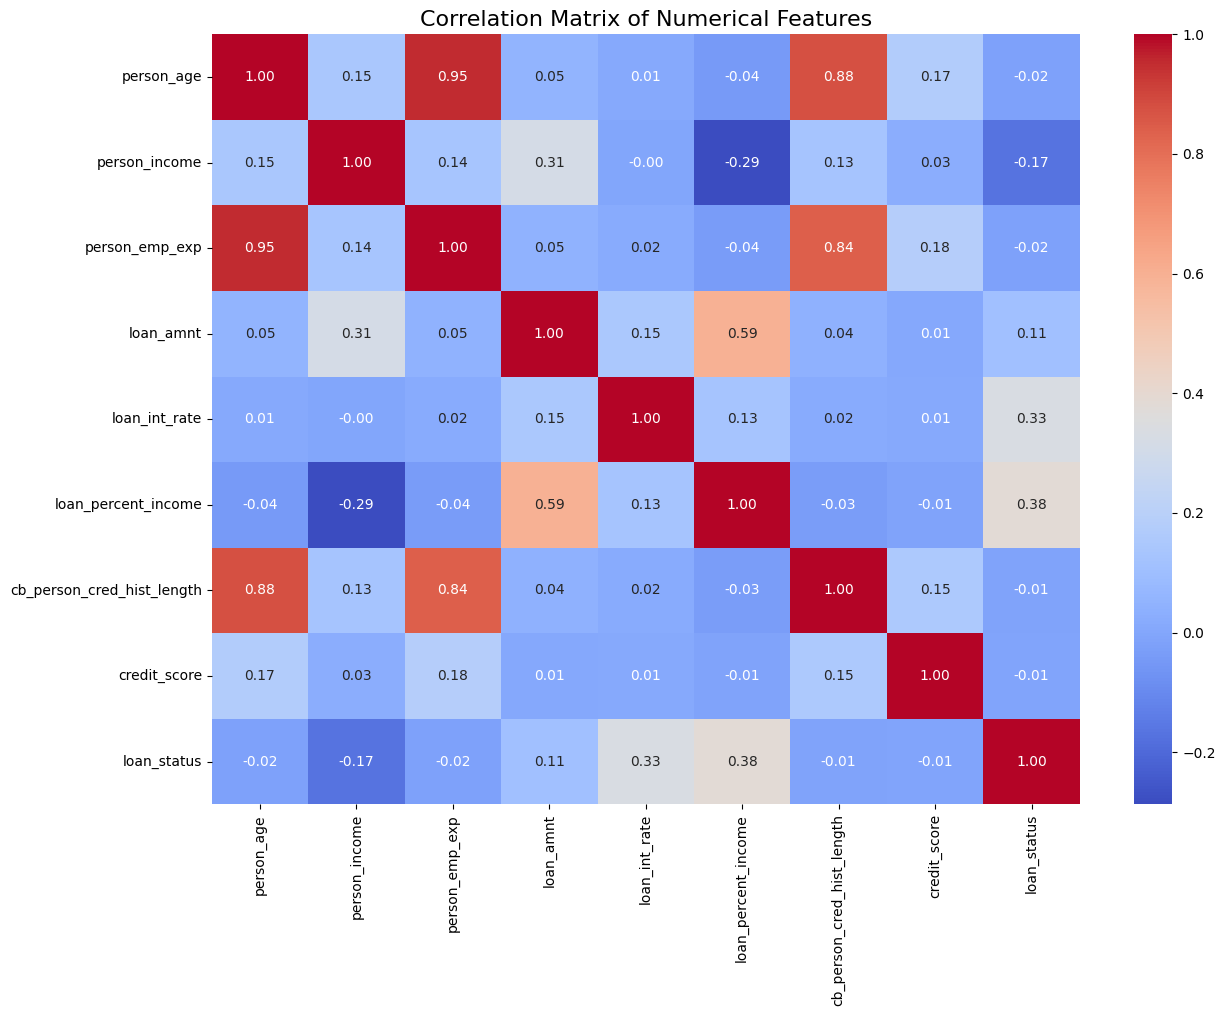

In [14]:
# 1. เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_df = df_cleaned.select_dtypes(include=['number'])

# 2. คำนวณค่าสหสัมพันธ์ (correlation)
corr_matrix = numerical_df.corr()

# 3. สร้าง Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

##Correlation Matrix
"ผลการวิเคราะห์จาก Correlation Matrix เผยให้เห็นถึงความสัมพันธ์ที่น่าสนใจซึ่งสวนทางกับหลักการในโลกความเป็นจริง อันเป็นลักษณะเฉพาะที่สำคัญของข้อมูลสังเคราะห์ (Synthetic Data) ชุดนี้:

**อัตราส่วนภาระหนี้ต่อรายได้ (loan_percent_income)** : "การวิเคราะห์ความสัมพันธ์ของ อัตราส่วนภาระหนี้ต่อรายได้ (loan_percent_income) เผยให้เห็นถึงความสัมพันธ์เชิงบวกกับสถานะการอนุมัติสินเชื่อ (loan_status) ซึ่งเป็นผลลัพธ์ที่สวนทางกับหลักการประเมินความเสี่ยงโดยสิ้นเชิง

ในทางปฏิบัติ อัตราส่วนนี้ (หรือที่เรียกว่า DTI - Debt-to-Income Ratio) เป็นตัวชี้วัดความสามารถในการชำระหนี้คืนที่สำคัญ โดยค่า DTI ที่สูงขึ้นหมายถึงภาระหนี้ที่มากขึ้นเมื่อเทียบกับรายได้ ซึ่งควรจะนำไปสู่โอกาสในการอนุมัติที่ ลดลง (ความสัมพันธ์เชิงลบ)

ดังนั้น ความสัมพันธ์เชิงบวกที่ปรากฏในข้อมูลชุดนี้จึงเป็นอีกหนึ่งหลักฐานสำคัญที่ตอกย้ำว่า กระบวนการสร้างข้อมูลสังเคราะห์ (SMOTENC) ได้สร้างความสัมพันธ์ภายในข้อมูลที่ผิดเพี้ยนไปจากตรรกะทางธุรกิจในความเป็นจริง"

***คะแนนเครดิต (Credit Score)***: โดยปกติแล้ว เราคาดว่า credit_score ที่สูง ซึ่งสะท้อนถึงประวัติการชำระหนี้ที่ดี ควรจะมีความสัมพันธ์เชิงบวกกับการอนุมัติสินเชื่อ (loan_status) แต่ในข้อมูลชุดนี้กลับมีความสัมพันธ์ที่ต่ำมากจนเกือบเป็นศูนย์ (-0.02) ซึ่งหมายความว่าคะแนนเครดิตแทบไม่มีผลต่อการตัดสินใจอนุมัติเลย

***อัตราดอกเบี้ย (loan_int_rate)***: ในทำนองเดียวกัน loan_int_rate ซึ่งในโลกธุรกิจมักจะสูงขึ้นตามความเสี่ยงของผู้กู้ (และควรจะสัมพันธ์เชิงลบกับการอนุมัติ) กลับมีความสัมพันธ์เชิงบวกกับ loan_status อย่างมีนัยสำคัญ (0.32) ในข้อมูลชุดนี้ ซึ่งหมายความว่า "ยิ่งอัตราดอกเบี้ยสูง โอกาสอนุมัติกลับยิ่งสูงขึ้น"

ความผิดปกติทั้งสองประเด็นนี้เป็นหลักฐานชิ้นสำคัญที่ยืนยันว่า กระบวนการสร้างข้อมูลสังเคราะห์ด้วยเทคนิค SMOTENC อาจได้สร้างความสัมพันธ์ที่ผิดเพี้ยนไปจากธรรมชาติ ทำให้การตีความผลลัพธ์จากข้อมูลชุดนี้ต้องทำด้วยความระมัดระวังและต้องอ้างอิงถึงที่มาของข้อมูลเสมอ"

In [12]:
status_counts = df_cleaned['loan_status'].value_counts()
print("Approved = 1 , Not Approved = 0")
print(status_counts)

Approved = 1 , Not Approved = 0
loan_status
0    34992
1    10000
Name: count, dtype: int64


/tmp/ipython-input-11-3445408749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({1: 'Approved', 0: 'Not Approved'})


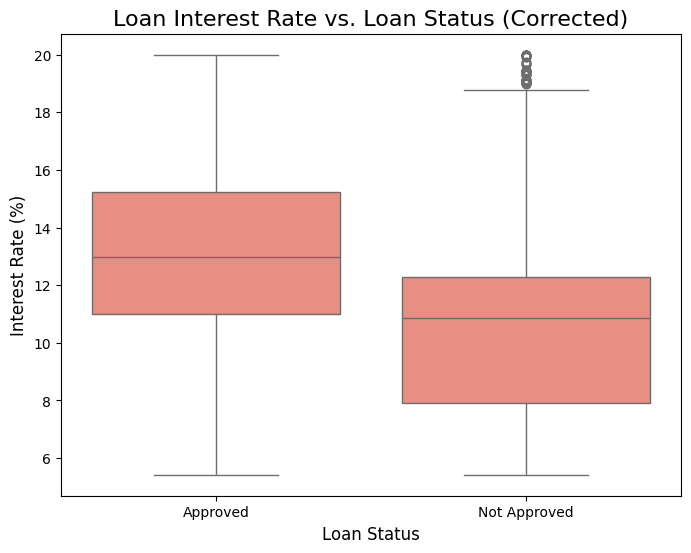

In [11]:
## สร้าง Column ใหม่ loan status label
df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({1: 'Approved', 0: 'Not Approved'})

# สร้าง Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='loan_status_label', y='loan_int_rate', color = 'salmon')
plt.title('Loan Interest Rate vs. Loan Status (Corrected)', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.show()

## Loan Interest Rate vs. Loan Status

จากตารางจะเห็นได้ว่าหาก Interest Rate สูงขึ้นการ Approved อาจมีกลุ่มลูกค้าที่ธนาคารมองว่ามีความสามารถในการจ่ายดอกเบี้ยสูง และยอมรับความเสี่ยงนั้นเพื่อแลกกับผลตอบแทน (ดอกเบี้ย) ที่สูงขึ้น
ซึ่งในโลกความเป็นจริงนั้น การอนุมัติสินเชื่อ
-ดอกเบี้ยที่สูงขึ้นมักจะทำให้การอนุมัติสินเชื่อง่ายขึ้นสำหรับผู้กู้ที่มีความเสี่ยงสูง แต่ก็อาจทำให้การอนุมัติยากขึ้นสำหรับผู้กู้ที่มีความเสี่ยงต่ำ

In [13]:
# ใช้ .value_counts() กับคอลัมน์ 'person_home_ownership' ใน DataFrame df_cleaned
home_ownership_counts = df_cleaned['person_home_ownership'].value_counts()

# แสดงผลลัพธ์
print(home_ownership_counts)

person_home_ownership
RENT        23439
MORTGAGE    18485
OWN          2951
OTHER         117
Name: count, dtype: int64


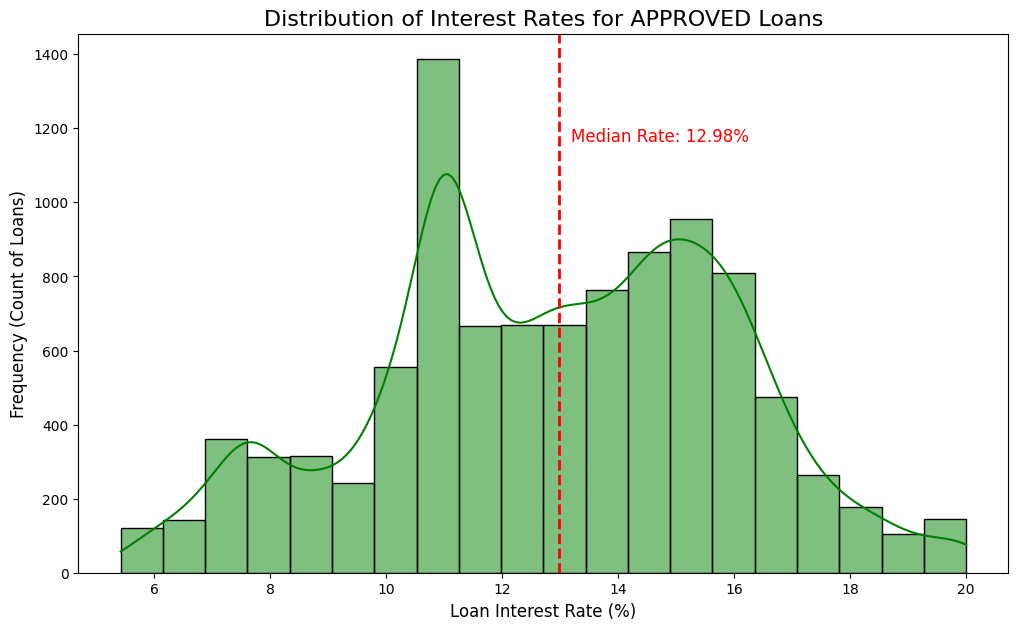


--- Statistics for Interest Rates on APPROVED Loans ---
count    10000.000000
mean        12.856794
std          3.068512
min          5.420000
25%         10.990000
50%         12.980000
75%         15.230000
max         20.000000
Name: loan_int_rate, dtype: float64


In [15]:
# กรองเฉพาะข้อมูลที่ใช้
approved_df = df_cleaned[df_cleaned['loan_status'] == 1].copy()

#สร้างกราฟ Histogram จากข้อมูลที่กรองแล้ว
plt.figure(figsize=(12, 7))
sns.histplot(data=approved_df, x='loan_int_rate', bins=20, kde=True, color='green')

# คำนวณค่ามัธยฐาน(median)ของดอกเบี้ยในกลุ่มนี้
median_rate = approved_df['loan_int_rate'].median()
# วาดเส้นแนวตั้งสีแดงที่ตำแหน่งของค่ามัธยฐาน
plt.axvline(median_rate, color='red', linestyle='--', linewidth=2)
# เพิ่มข้อความกำกับเส้น
plt.text(median_rate + 0.2, # ตำแหน่งแกน x (ขยับจากเส้นไปทางขวาเล็กน้อย)
         plt.ylim()[1] * 0.8, # ตำแหน่งแกน y (วางไว้ที่ 80% ของความสูงกราฟ)
         f'Median Rate: {median_rate:.2f}%', # ข้อความที่จะแสดง
         color='red',
         fontsize=12)

# 4.  Title and Label
plt.title('Distribution of Interest Rates for APPROVED Loans', fontsize=16)
plt.xlabel('Loan Interest Rate (%)', fontsize=12)
plt.ylabel('Frequency (Count of Loans)', fontsize=12)
plt.show()


print("\n--- Statistics for Interest Rates on APPROVED Loans ---")
print(approved_df['loan_int_rate'].describe())

##  การกระจายตัวของ Loan interest Rate
"ถึงแม้ว่าการวิเคราะห์ความสัมพันธ์โดยรวมจะชี้ให้เห็นว่า loan_int_rate มีความสัมพันธ์เชิงบวกกับสถานะการอนุมัติ (loan_status) แต่เมื่อเจาะลึกลงไปที่การกระจายตัวของอัตราดอกเบี้ยเฉพาะในกลุ่มที่ได้รับการอนุมัติ (Approved) พบว่า ปริมาณการอนุมัติสินเชื่อส่วนใหญ่กระจุกตัวอยู่ในช่วงอัตราดอกเบี้ยระดับกลางที่ 10% ถึง 12% การค้นพบนี้ชี้ให้เห็นว่าการอนุมัติไม่ได้ขึ้นอยู่กับอัตราดอกเบี้ยสูงเพียงปัจจัยเดียว และในการปฏิบัติจริง การอนุมัติส่วนใหญ่ยังคงเกิดขึ้นในช่วงอัตราดอกเบี้ยที่สมเหตุสมผล"

/tmp/ipython-input-16-4026864245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({0: 'Not Approved', 1: 'Approved'})


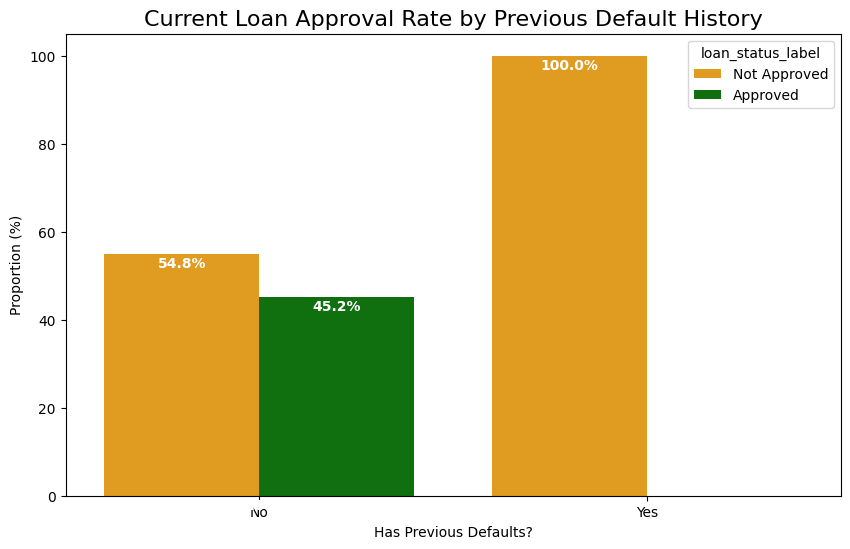

In [16]:
## Previous Loan
# --- กราฟที่ 1: เปรียบเทียบสัดส่วนการอนุมัติ ---

# ยืนยันการใช้ Label ที่ถูกต้องเสมอ (0=Not Approved, 1=Approved)
df_cleaned['loan_status_label'] = df_cleaned['loan_status'].map({0: 'Not Approved', 1: 'Approved'})

# จัดเตรียมข้อมูลสัดส่วน
prop_df_defaults = df_cleaned.groupby('previous_loan_defaults_on_file')['loan_status_label'].value_counts(normalize=True).mul(100).rename('proportion').reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=prop_df_defaults, x='previous_loan_defaults_on_file', y='proportion', hue='loan_status_label', palette={'Approved': 'green', 'Not Approved': 'orange'})

# ใส่ตัวเลข % กำกับ
for patch in ax.patches:
    height = patch.get_height()
    # ย้ายตำแหน่งแกน Y ให้อยู่ข้างในแท่ง (เช่น height - 3) และเปลี่ยนสีตัวอักษรเป็นสีขาว
    ax.text(x=patch.get_x() + patch.get_width() / 2, y=height - 3, s=f'{height:.1f}%', ha='center', color='white', weight='bold')

plt.title('Current Loan Approval Rate by Previous Default History', fontsize=16)
plt.ylabel('Proportion (%)')
plt.xlabel('Has Previous Defaults?')
plt.ylim(0, 105)
plt.show()

##  ผลกระทบของประวัติการผิดนัดชำระหนี้ต่อการอนุมัติสินเชื่อ

"จากการวิเคราะห์สัดส่วนการอนุมัติสินเชื่อ พบว่า previous_loan_defaults_on_file เป็นปัจจัยสำคัญที่มีผลต่อการตัดสินใจอนุมัติสินเชื่ออย่างมีนัยสำคัญที่สุดในข้อมูลชุดนี้ โดยสามารถสรุปได้เป็น 2 ประเด็นหลัก:

กฎการปฏิเสธอัตโนมัติ (Hard Rule): กลุ่มผู้กู้ที่เคยมีประวัติผิดนัดชำระหนี้มาก่อน (ค่าเป็น 'Yes') มีสัดส่วนการถูกปฏิเสธสินเชื่อ (Not Approved) สูงถึง 100% ซึ่งชี้ให้เห็นว่านี่เป็นคุณสมบัติขั้นพื้นฐานที่ใช้คัดกรองผู้กู้ออกทันที

การพิจารณาปัจจัยอื่นร่วม: ในทางกลับกัน กลุ่มผู้กู้ที่ไม่เคยมีประวัติผิดนัดชำระหนี้ (ค่าเป็น 'No') แม้จะมีโอกาสได้รับการอนุมัติสูงกว่า แต่ก็ไม่ได้รับประกันการอนุมัติเสมอไป ซึ่งบ่งชี้ว่าธนาคารยังคงนำปัจจัยเสี่ยงอื่นๆ เช่น รายได้, วัตถุประสงค์การกู้, หรือสถานะการถือครองบ้าน มาพิจารณาประกอบการตัดสินใจด้วย"

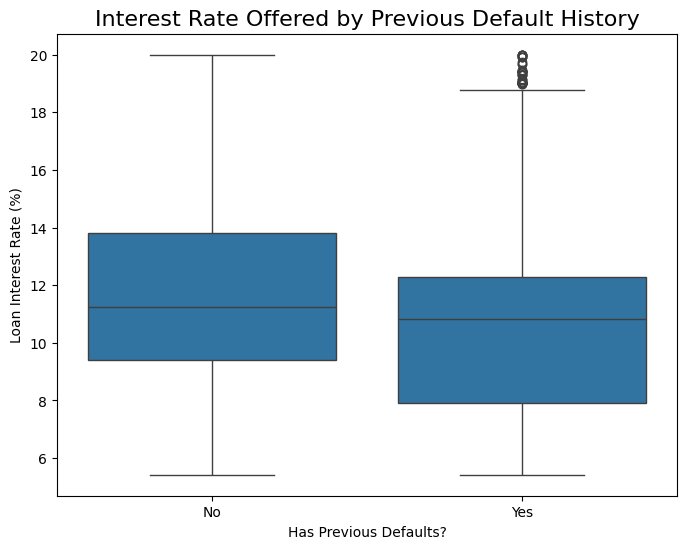

In [17]:
# --- กราฟที่ 2: เปรียบเทียบการกระจายตัวของอัตราดอกเบี้ย ---
## No = เคยผิดชำระหนี้ , Yes =

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='previous_loan_defaults_on_file', y='loan_int_rate')
plt.title('Interest Rate Offered by Previous Default History', fontsize=16)
plt.xlabel('Has Previous Defaults?')
plt.ylabel('Loan Interest Rate (%)')
plt.show()

##ความสัมพันธ์ที่ผิดปกติระหว่างประวัติการผิดนัดชำระหนี้และอัตราดอกเบี้ย

"การวิเคราะห์พบความสัมพันธ์ที่สวนทางกับหลักการบริหารความเสี่ยงอย่างชัดเจน โดยกลุ่มผู้กู้ที่เคยมีประวัติผิดนัดชำระหนี้ในอดีต (ค่าเป็น 'Yes') ซึ่งควรจัดเป็นกลุ่มความเสี่ยงสูง กลับได้รับข้อเสนออัตราดอกเบี้ยเฉลี่ยที่ ต่ำกว่า กลุ่มผู้กู้ที่ไม่เคยมีประวัติเสีย"

"ความผิดปกตินี้เป็นหลักฐานที่สำคัญอีกชิ้นหนึ่งที่ชี้ให้เห็นว่าข้อมูลชุดนี้เป็นข้อมูลสังเคราะห์ (Synthetic Data) และมีความสัมพันธ์ภายในที่ไม่สะท้อนตรรกะทางธุรกิจในโลกความเป็นจริง ซึ่งเป็นข้อจำกัดที่สำคัญอย่างยิ่งที่ต้อ

In [18]:
## Save data for next plan
loan_data_cleaned = 'loan_data_cleaned.csv'

#    - index=False คือส่วนที่สำคัญที่สุด เพื่อไม่ให้มีคอลัมน์ที่ไม่ต้องการเพิ่มเข้ามา
df_cleaned.to_csv(loan_data_cleaned, index=False)

print(f"Successfully saved the cleaned data to '{loan_data_cleaned}'")

Successfully saved the cleaned data to 'loan_data_cleaned.csv'
